### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

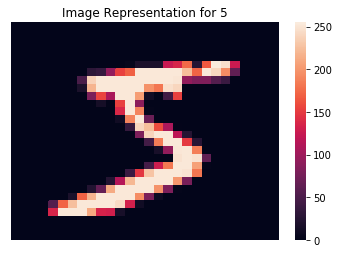

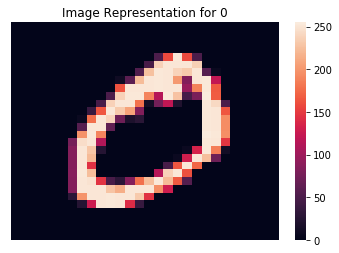

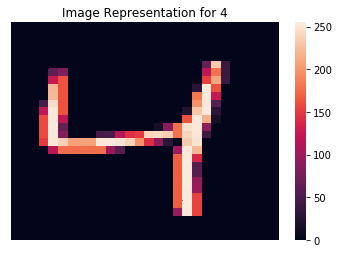

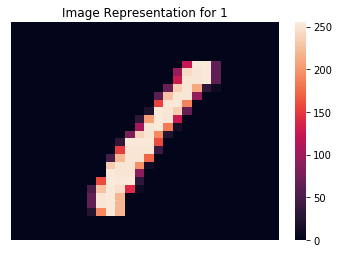

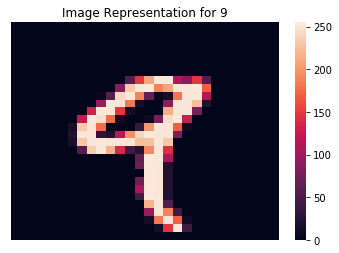

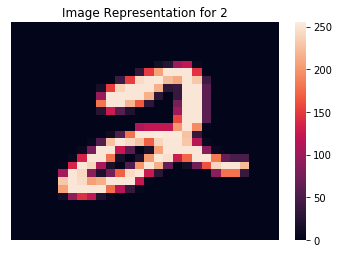

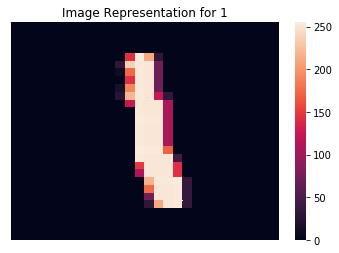

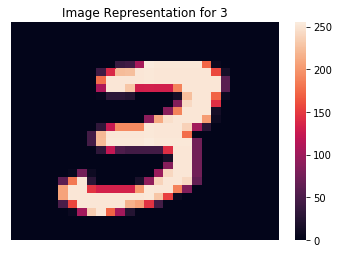

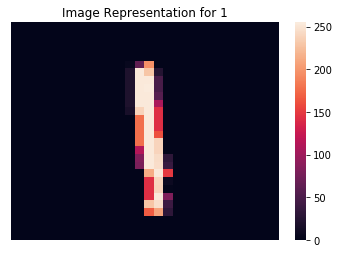

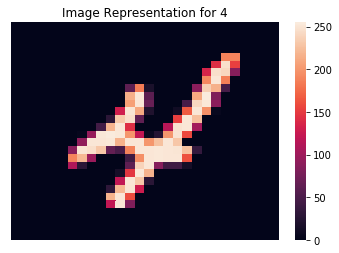

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# Decision Tree

In [14]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_train = X_shuffle[0:50000]
y_train = y_shuffle[0:50000]

In [15]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict


dt_clf = tree.DecisionTreeClassifier()

y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Calculate Cross Validation Score

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85934501,  0.85958596,  0.85098722])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [17]:
y_train_pred

array([6, 9, 9, ..., 2, 9, 3], dtype=uint8)

In [18]:
y_train

array([6, 9, 9, ..., 2, 9, 3], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [19]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [20]:
confusionMatrix

array([[4465,   12,   74,   56,   33,   85,   75,   30,   60,   46],
       [   6, 5288,   59,   50,   23,   43,   17,   23,   51,   25],
       [  70,   73, 4148,  156,   69,   63,   85,  105,  169,   50],
       [  59,   58,  172, 4058,   37,  237,   25,   95,  174,  135],
       [  24,   38,   57,   28, 4182,   50,   72,   67,   83,  230],
       [  68,   50,   50,  224,   68, 3626,  122,   34,  146,  113],
       [  90,   25,  112,   34,   60,  124, 4389,    4,  107,   27],
       [  20,   52,  114,   76,   83,   29,   11, 4674,   48,  149],
       [  65,   82,  145,  193,  111,  179,   98,   74, 3777,  155],
       [  27,   31,   44,  105,  221,  123,   23,  150,  102, 4176]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

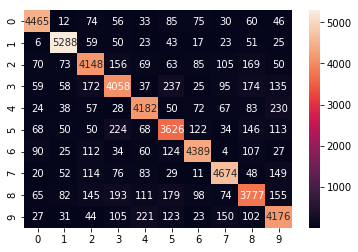

In [21]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [22]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [23]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

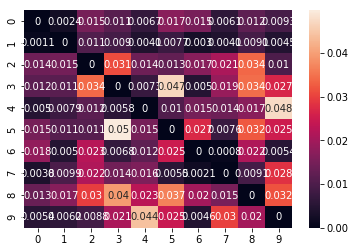

In [24]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [25]:
y_test_pred = dt_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 5], dtype=uint8)

In [26]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 911,    0,    6,   11,    5,   18,   10,    8,    6,    5],
       [   0, 1091,    8,    8,    3,    3,    3,    5,   13,    1],
       [  15,   23,  867,   30,   12,   13,   16,   28,   22,    6],
       [   9,   12,   27,  828,    6,   50,    4,   17,   35,   22],
       [   5,    3,   12,    7,  874,   10,   13,    6,   16,   36],
       [  17,   10,   11,   33,    8,  739,   25,    6,   33,   10],
       [  15,    7,   14,    5,   24,   17,  856,    3,   15,    2],
       [   5,   10,   20,   11,    9,    3,    0,  931,   11,   28],
       [   8,   13,   30,   27,   20,   37,   20,   10,  778,   31],
       [   7,    4,   11,   13,   41,   11,    8,   19,   22,  873]], dtype=int64)

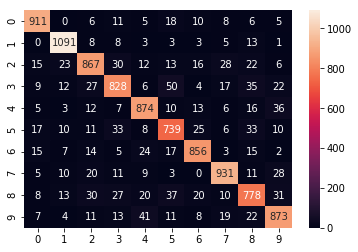

In [27]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [28]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

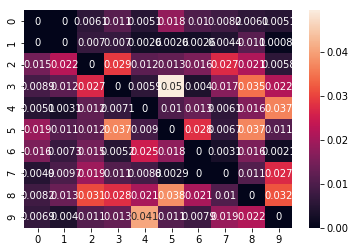

In [29]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.87480000000000002